In [11]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy 
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [6]:
category = numpy.max(Y_train) + 1

46

In [15]:
# 데이터 잔처리

x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [14]:
# 모델

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation="tanh"))
model.add(Dense(46, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 27s 269ms/step - loss: 2.6181 - accuracy: 0.3402 - val_loss: 2.3100 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 25s 278ms/step - loss: 2.2771 - accuracy: 0.4134 - val_loss: 2.4214 - val_accuracy: 0.3620
Epoch 3/20
90/90 [==============================] - 25s 277ms/step - loss: 2.2211 - accuracy: 0.4126 - val_loss: 1.9528 - val_accuracy: 0.5125
Epoch 4/20
90/90 [==============================] - 25s 278ms/step - loss: 1.8500 - accuracy: 0.5131 - val_loss: 1.7817 - val_accuracy: 0.5414
Epoch 5/20
90/90 [==============================] - 24s 265ms/step - loss: 1.7150 - accuracy: 0.5612 - val_loss: 1.7059 - val_accuracy: 0.5597
Epoch 6/20
90/90 [==============================] - 24s 264ms/step - loss: 1.6239 - accuracy: 0.5885 - val_loss: 1.6553 - val_accuracy: 0.5815
Epoch 7/20
90/90 [==============================] - 27s 305ms/step - loss: 1.5336 - accuracy: 0.6118 - val_loss: 1.5720 - val_accuracy: 0.6051

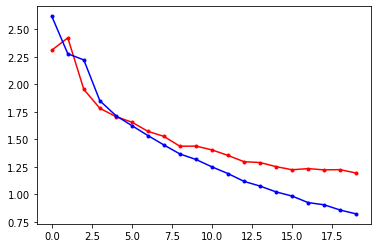

In [17]:
y_vloss = history.history["val_loss"]

y_loss = history.history["loss"]

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

No handles with labels found to put in legend.


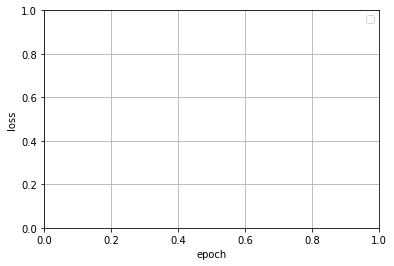

In [18]:
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel('loss')
plt.show()

In [19]:
model.save("lstm.hdf5")